In [892]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [893]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

Data Dictionary
TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

In [894]:
d = pd.read_csv('C:/Users/Ragul/Downloads/Machine Learning-1/Self/cancer_reg.csv')
d.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.900000,489.800000,61898,260131,11.200000,499.748204,"(61494.5, 125635]",39.300000,36.900000,41.700000,"Kitsap County, Washington",2.540000,52.500000,11.500000,39.500000,42.100000,6.900000,23.200000,19.600000,51.900000,8.000000,75.100000,nan,41.600000,32.900000,14.000000,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.300000,411.600000,48127,43269,18.600000,23.111234,"(48021.6, 51046.4]",33.000000,32.200000,33.700000,"Kittitas County, Washington",2.340000,44.500000,6.100000,22.400000,64.000000,7.500000,26.000000,22.700000,55.900000,7.800000,70.200000,53.800000,43.600000,31.100000,15.300000,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


In [895]:
d.shape

(3047, 34)

In [896]:
d.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite            

In [897]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
incidencerate              3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null object
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
geography                  3047 non-null object
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctsomecol18_24            762 non-null float64
pctbachdeg18_24     

In [898]:
d.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [899]:
d.isnull().sum()/len(d)*100

avganncount                0.000000
avgdeathsperyear           0.000000
target_deathrate           0.000000
incidencerate              0.000000
medincome                  0.000000
popest2015                 0.000000
povertypercent             0.000000
studypercap                0.000000
binnedinc                  0.000000
medianage                  0.000000
medianagemale              0.000000
medianagefemale            0.000000
geography                  0.000000
avghouseholdsize           0.000000
percentmarried             0.000000
pctnohs18_24               0.000000
pcths18_24                 0.000000
pctsomecol18_24           74.991795
pctbachdeg18_24            0.000000
pcths25_over               0.000000
pctbachdeg25_over          0.000000
pctemployed16_over         4.988513
pctunemployed16_over       0.000000
pctprivatecoverage         0.000000
pctprivatecoveragealone   19.986872
pctempprivcoverage         0.000000
pctpubliccoverage          0.000000
pctpubliccoveragealone     0

In [900]:
d = d.drop('pctsomecol18_24',1)

In [901]:
d.pctemployed16_over.describe()

count   2895.000000
mean      54.152642
std        8.315064
min       17.600000
25%       48.600000
50%       54.500000
75%       60.300000
max       80.100000
Name: pctemployed16_over, dtype: float64

In [902]:
fil = d.pctemployed16_over.fillna(d.pctemployed16_over.median())
fil1 = d.pctemployed16_over.fillna(d.pctemployed16_over.mean())

In [903]:
print(fil.describe())
print(fil1.describe())

count   3047.000000
mean      54.169970
std        8.105295
min       17.600000
25%       48.900000
50%       54.500000
75%       60.000000
max       80.100000
Name: pctemployed16_over, dtype: float64
count   3047.000000
mean      54.152642
std        8.104942
min       17.600000
25%       48.900000
50%       54.152642
75%       60.000000
max       80.100000
Name: pctemployed16_over, dtype: float64


In [904]:
d.pctemployed16_over = fil1

In [905]:
d.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
avghouseholdsize             0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over           0
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrat

In [906]:
fil_1 = d.pctprivatecoveragealone.fillna(d.pctprivatecoveragealone.median())
fil_2 = d.pctprivatecoveragealone.fillna(d.pctprivatecoveragealone.mean())

In [907]:
print(d.pctprivatecoveragealone.describe())
print(fil_1.describe())
print(fil_2.describe())

count   2438.000000
mean      48.453774
std       10.083006
min       15.700000
25%       41.000000
50%       48.700000
75%       55.600000
max       78.900000
Name: pctprivatecoveragealone, dtype: float64
count   3047.000000
mean      48.502987
std        9.019423
min       15.700000
25%       43.100000
50%       48.700000
75%       53.800000
max       78.900000
Name: pctprivatecoveragealone, dtype: float64
count   3047.000000
mean      48.453774
std        9.018885
min       15.700000
25%       43.100000
50%       48.453774
75%       53.800000
max       78.900000
Name: pctprivatecoveragealone, dtype: float64


In [908]:
d.pctprivatecoveragealone = fil_1

In [909]:
d.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [910]:
num_data = d.select_dtypes(include=np.number)
num_data.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.900000,489.800000,61898,260131,11.200000,499.748204,39.300000,36.900000,41.700000,2.540000,52.500000,11.500000,39.500000,6.900000,23.200000,19.600000,51.900000,8.000000,75.100000,48.700000,41.600000,32.900000,14.000000,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.300000,411.600000,48127,43269,18.600000,23.111234,33.000000,32.200000,33.700000,2.340000,44.500000,6.100000,22.400000,7.500000,26.000000,22.700000,55.900000,7.800000,70.200000,53.800000,43.600000,31.100000,15.300000,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


In [911]:
cat_data = d.select_dtypes(exclude=np.number)
cat_data.head(5)

,binnedinc,geography
0,"(61494.5, 125635]","Kitsap County, Washington"
1,"(48021.6, 51046.4]","Kittitas County, Washington"
2,"(48021.6, 51046.4]","Klickitat County, Washington"
3,"(42724.4, 45201]","Lewis County, Washington"
4,"(48021.6, 51046.4]","Lincoln County, Washington"


In [912]:
corr = d.corr()

<function matplotlib.pyplot.show(*args, **kw)>

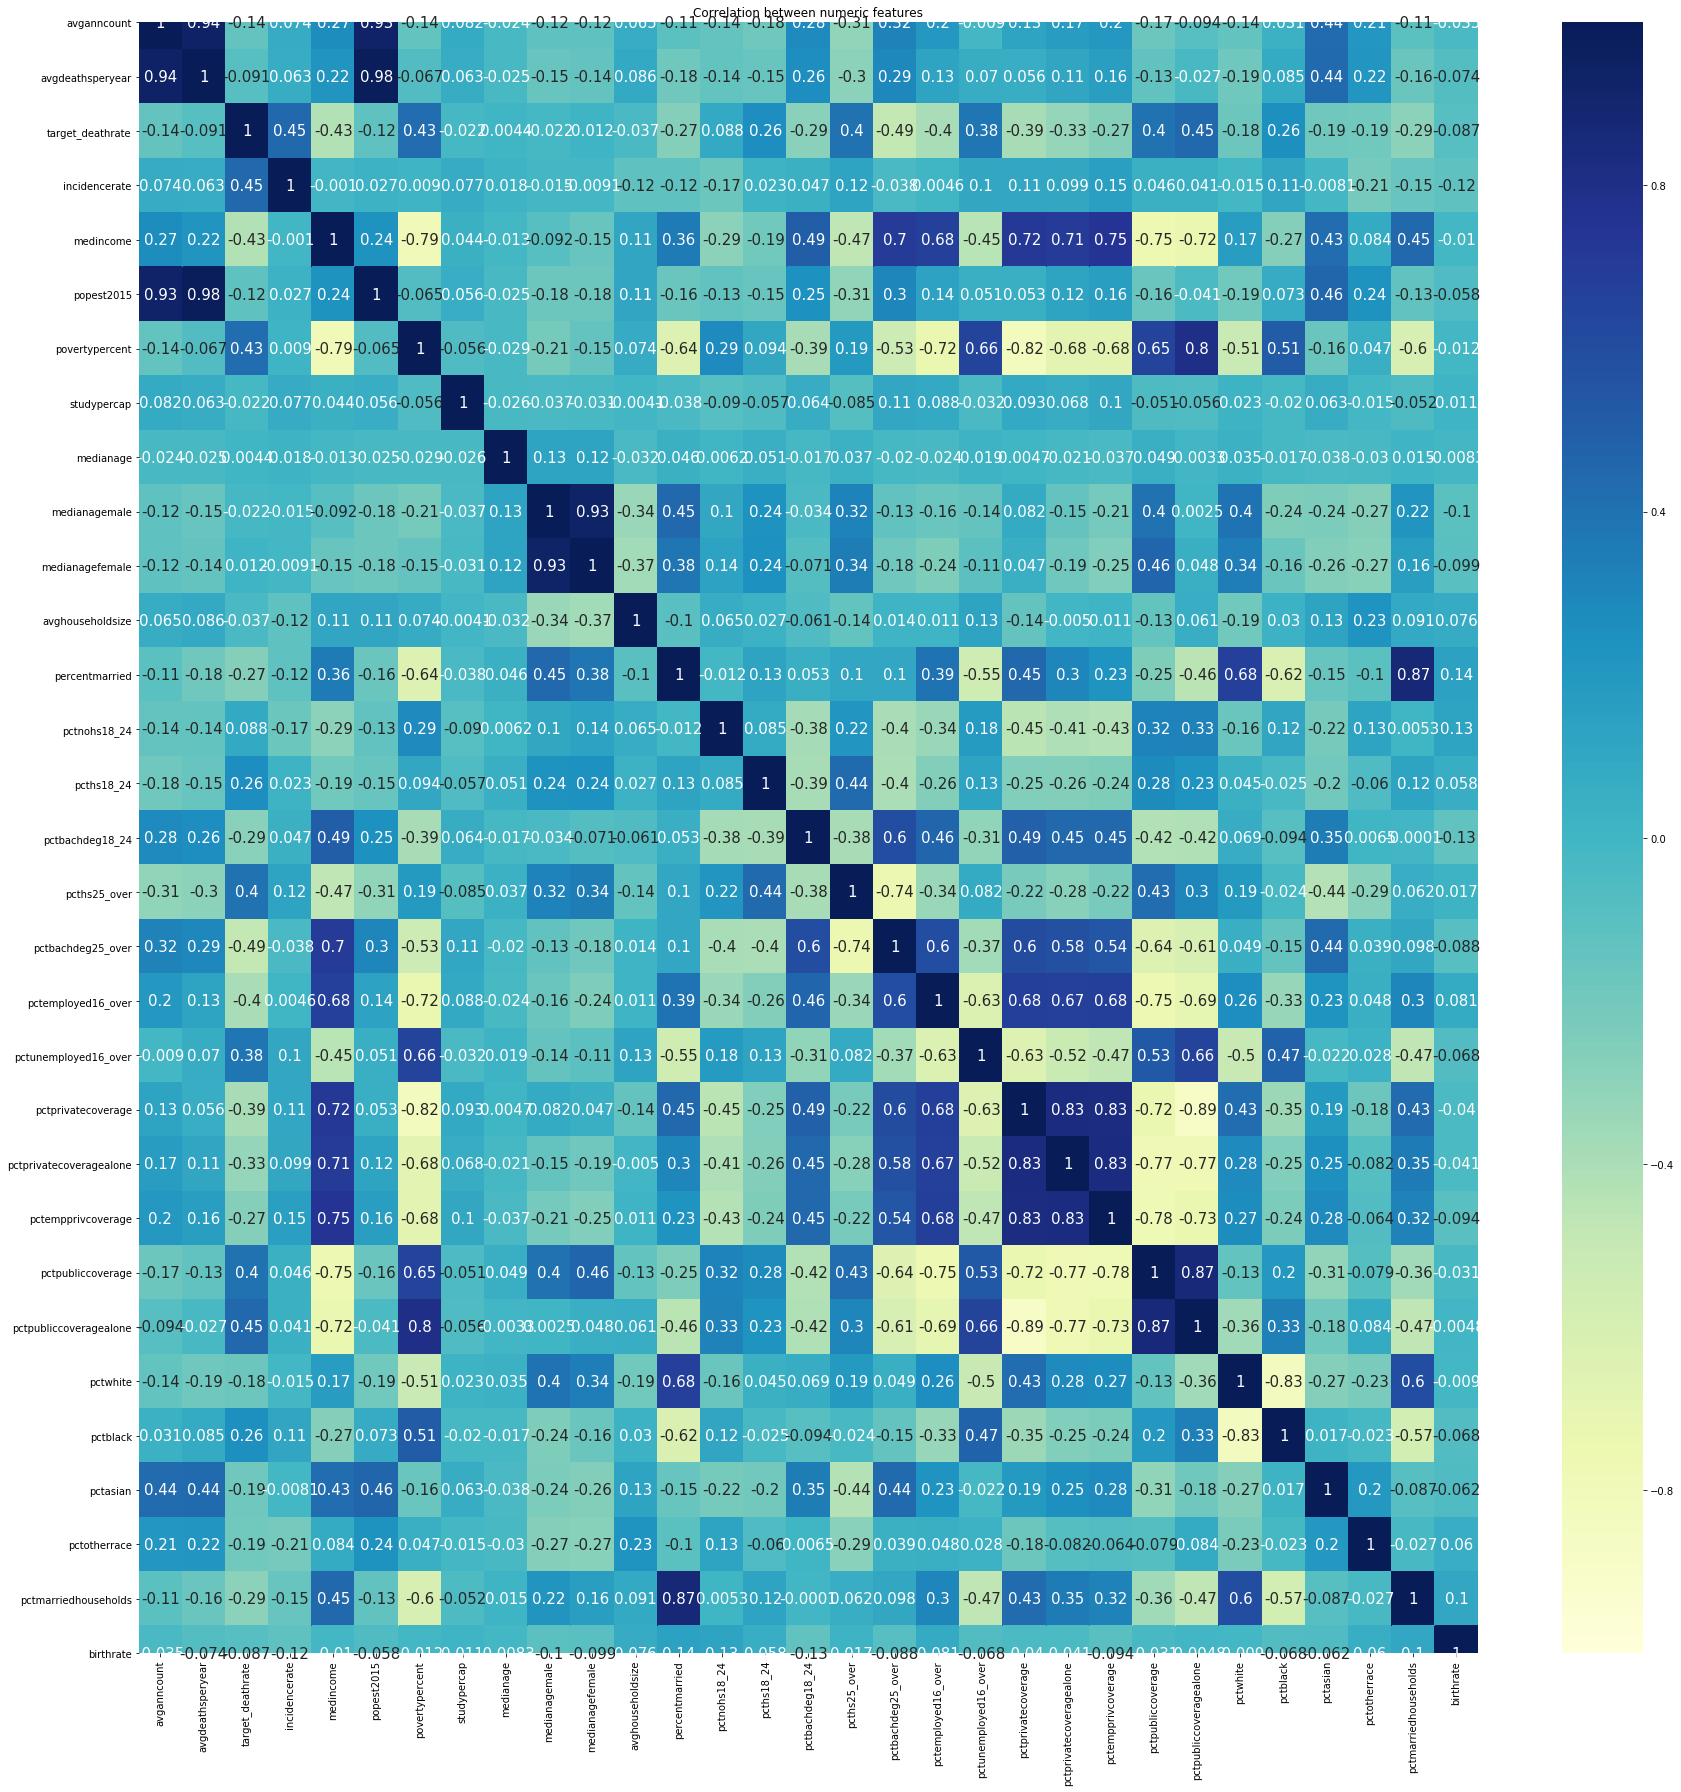

In [913]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show

In [914]:
corr

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,-0.122844,0.064788,-0.106108,-0.143327,-0.182054,0.284176,-0.311375,0.321021,0.197981,-0.009016,0.132244,0.166670,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,-0.144069,0.086161,-0.181029,-0.136794,-0.151418,0.259761,-0.295929,0.293210,0.125015,0.069701,0.056183,0.112218,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,0.012048,-0.036905,-0.266820,0.088463,0.261976,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326195,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.118400,-0.119524,-0.170762,0.022644,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098707,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,0.112065,0.355123,-0.289383,-0.190006,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706971,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,0.109940,-0.160463,-0.126582,-0.151821,0.248375,-0.311849,0.297463,0.139571,0.050768,0.052677,0.121343,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,0.074308,-0.642857,0.288106,0.094211,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682822,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,-0.004071,-0.038143,-0.090387,-0.057035,0.063819,-0.085128,0.108594,0.087669,-0.031957,0.092545,0.068458,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,-0.031944,0.046372,0.006178,0.050574,-0.016909,0.036587,-0.020352,-0.023598,0.018590,0.004665,-0.021388,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,-0.343189,0.449986,0.100486,0.241310,-0.034135,0.318277,-0.131599,-0.161204,-0.142737,0.082232,-0.147777,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


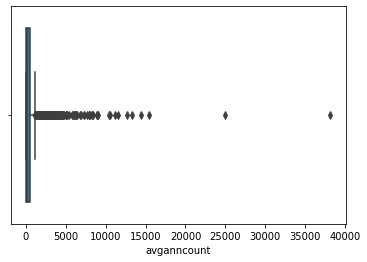

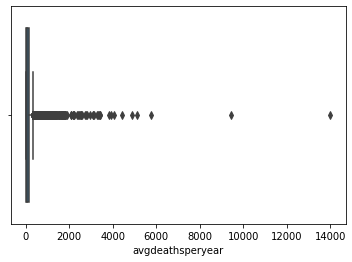

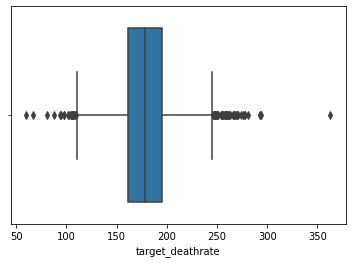

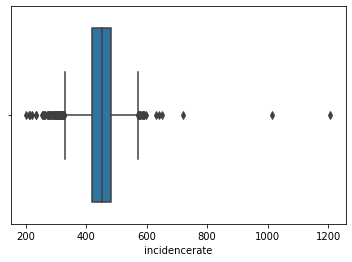

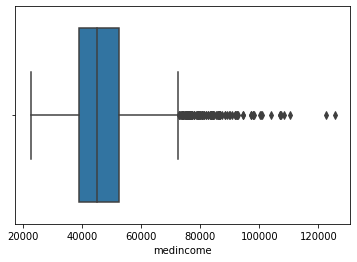

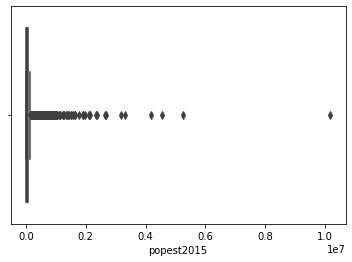

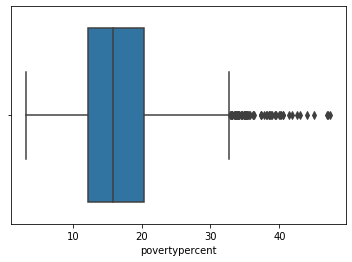

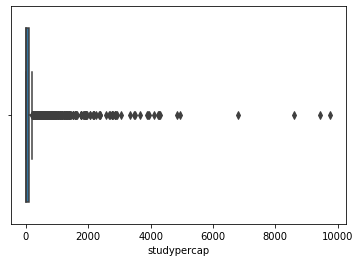

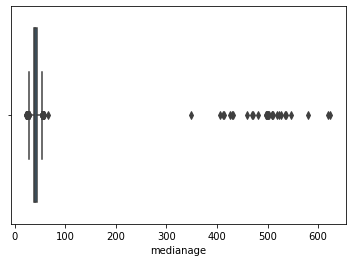

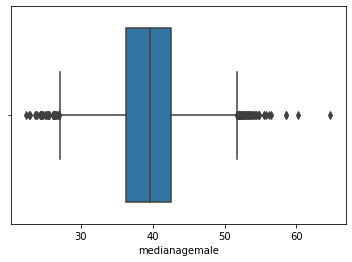

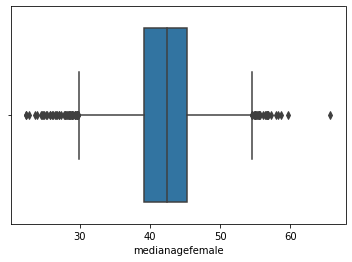

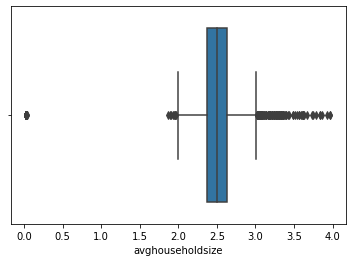

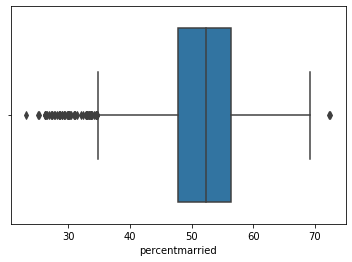

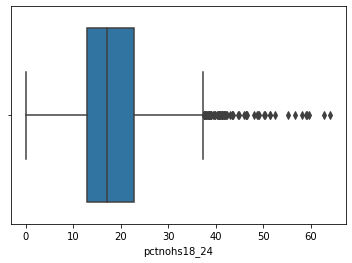

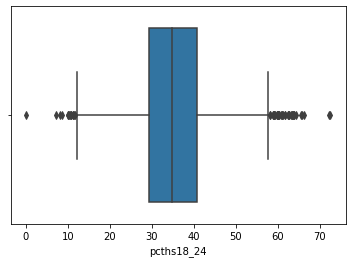

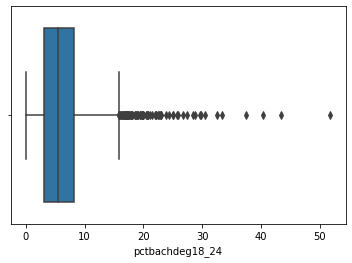

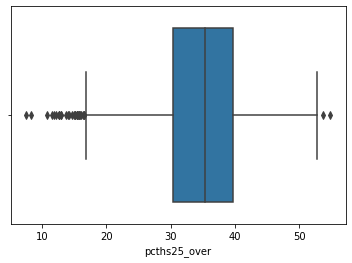

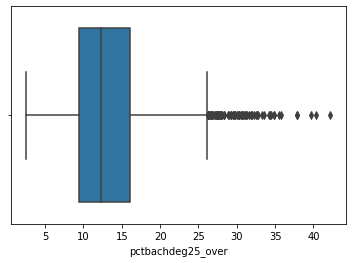

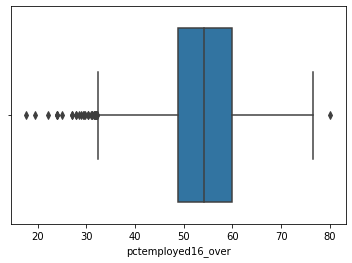

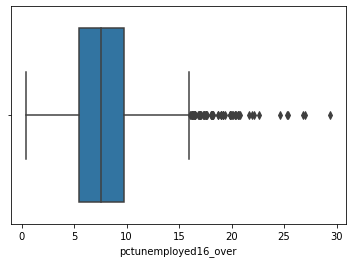

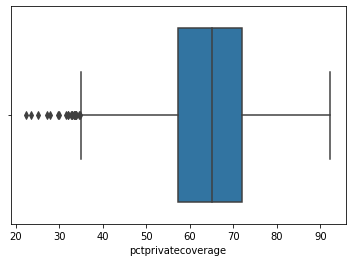

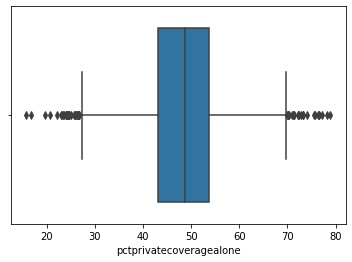

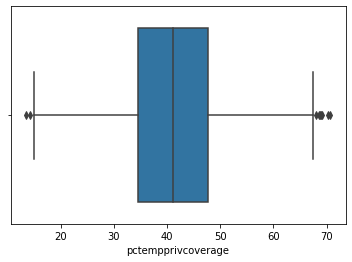

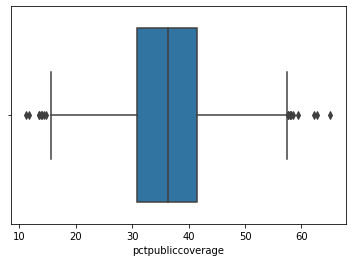

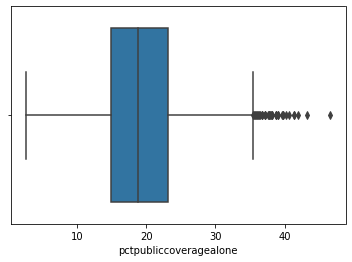

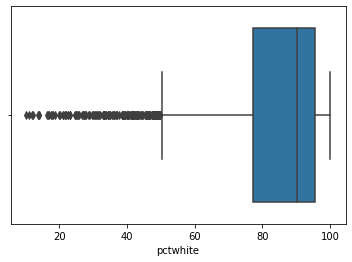

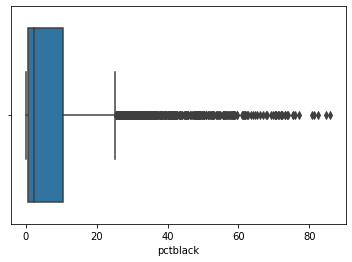

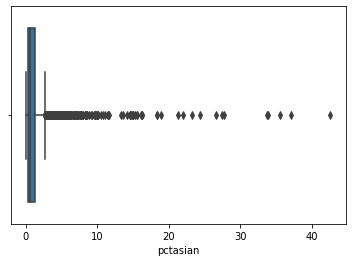

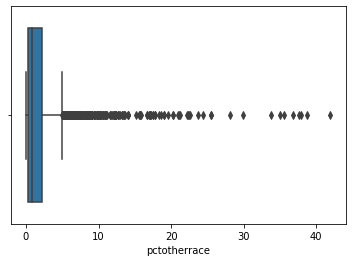

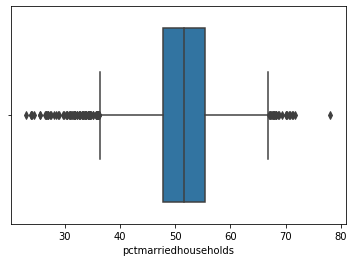

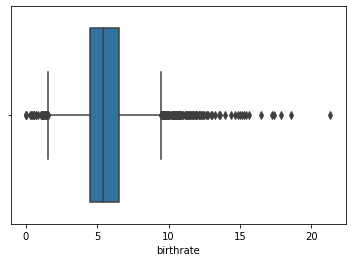

In [915]:
 for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [916]:
cat_data.geography = cat_data.geography.map(lambda x:x.split(',')[1].lstrip())

C:\Users\Ragul\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [917]:
cat_data.geography.value_counts()

Texas                   233
Georgia                 155
Virginia                125
Kentucky                120
Missouri                115
Kansas                  102
Illinois                102
Iowa                     99
North Carolina           99
Tennessee                95
Indiana                  92
Ohio                     87
Minnesota                87
Michigan                 83
Mississippi              82
Nebraska                 80
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Florida                  66
Louisiana                64
Alabama                  63
New York                 62
Colorado                 60
South Dakota             59
California               57
West Virginia            55
North Dakota             51
Montana                  48
South Carolina           46
Idaho                    42
Washington               39
Oregon                   36
New Mexico               32
Utah                

In [918]:
cat_data.geography = cat_data.geography.replace(['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont','New Jersey','New York','Pennsylvania'],
                                                      'North-East')

In [919]:
cat_data.geography = cat_data.geography.replace([('Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota')],
                                                      'Mid-West')

In [920]:
cat_data.geography = cat_data.geography.replace([('Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','District of Columbia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas')],
                                                      'South')

In [921]:
cat_data.geography = cat_data.geography.replace([('Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','Alaska','California','Hawaii','Oregon','Washington')],
                                                      'West')

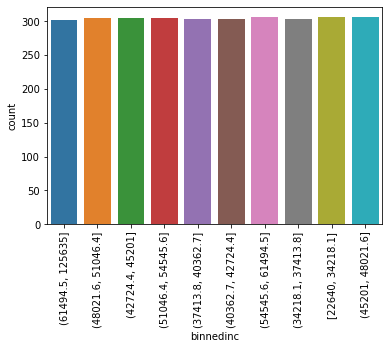

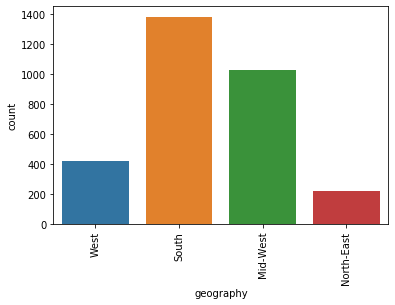

In [922]:
for loc in range(2):
    sns.countplot(cat_data.iloc[:,loc])
    plt.xticks(rotation=90)
    plt.show()

In [923]:
data = pd.concat([num_data,cat_data],axis=1)
data.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedinc,geography
0,1397.000000,469,164.900000,489.800000,61898,260131,11.200000,499.748204,39.300000,36.900000,41.700000,2.540000,52.500000,11.500000,39.500000,6.900000,23.200000,19.600000,51.900000,8.000000,75.100000,48.700000,41.600000,32.900000,14.000000,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,"(61494.5, 125635]",West
1,173.000000,70,161.300000,411.600000,48127,43269,18.600000,23.111234,33.000000,32.200000,33.700000,2.340000,44.500000,6.100000,22.400000,7.500000,26.000000,22.700000,55.900000,7.800000,70.200000,53.800000,43.600000,31.100000,15.300000,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,"(48021.6, 51046.4]",West


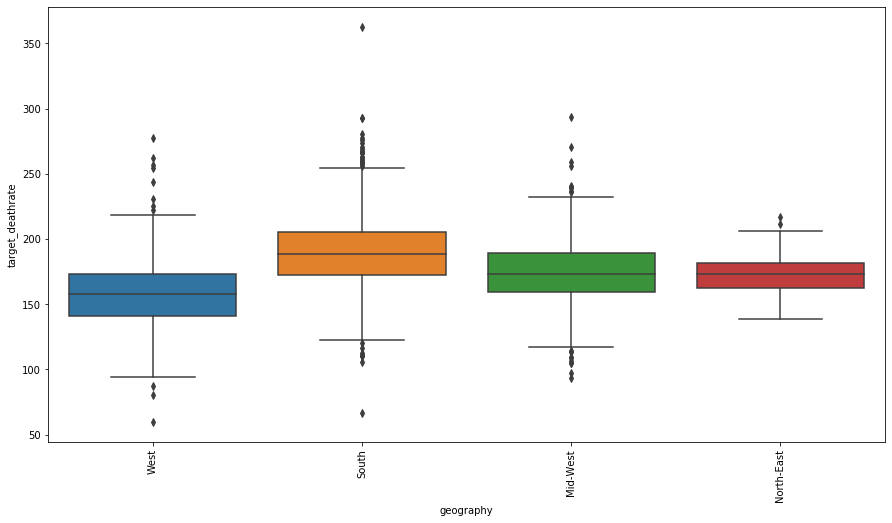

In [924]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="geography", y="target_deathrate", data=data)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

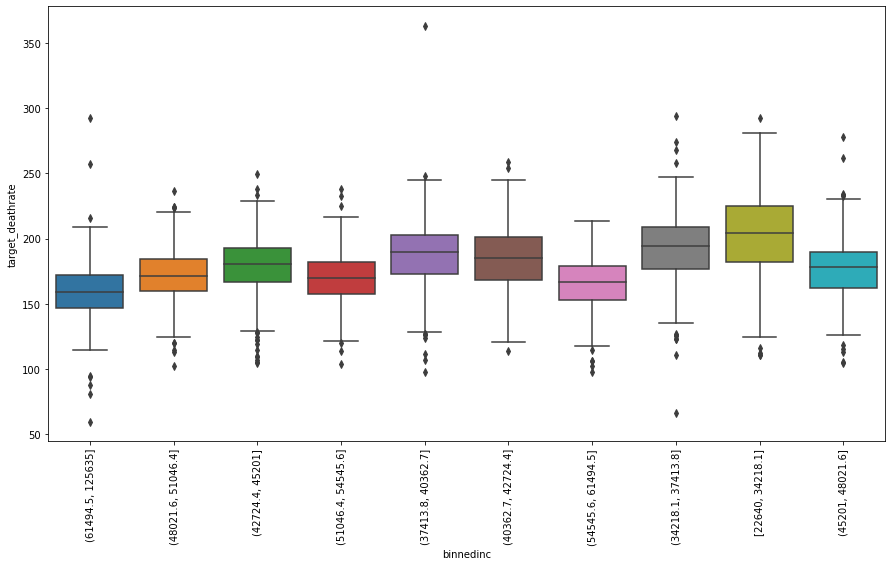

In [925]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="binnedinc", y="target_deathrate", data=data)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

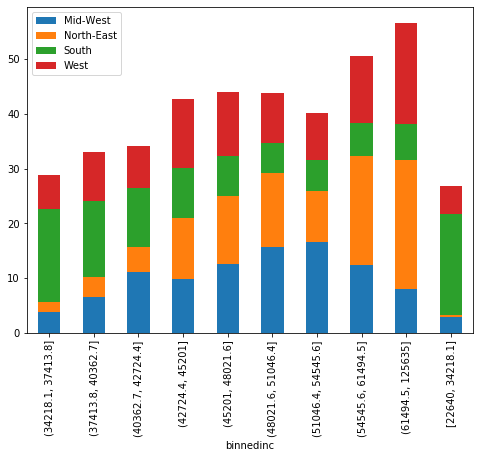

In [926]:
tab = pd.crosstab(data.binnedinc,data.geography)/data.geography.value_counts()*100
tab.plot(kind='bar',stacked=True,figsize=(8,6))

In [927]:
q1=num_data.quantile(0.25)
q3=num_data.quantile(0.75)
iqr=q3-q1
lb=q1-(iqr*1.5)
ub=q3+(iqr*1.5)
num_data=num_data.replace(num_data[num_data<lb],num_data.quantile(0.05))
num_data=num_data.replace(num_data[num_data>ub],num_data.quantile(0.95))

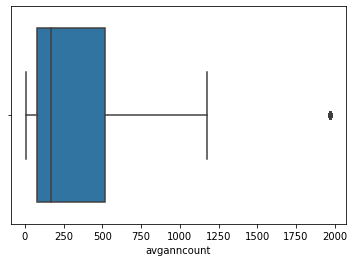

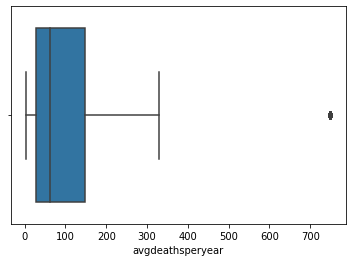

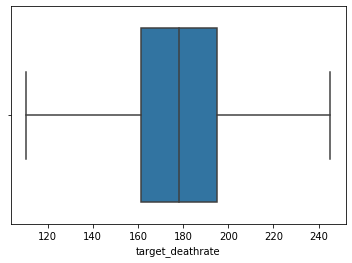

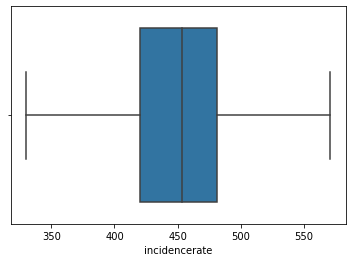

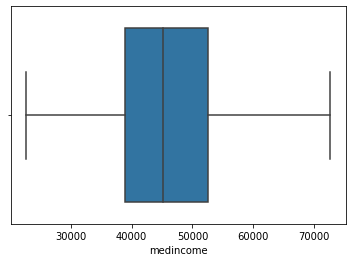

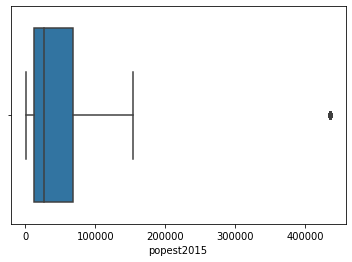

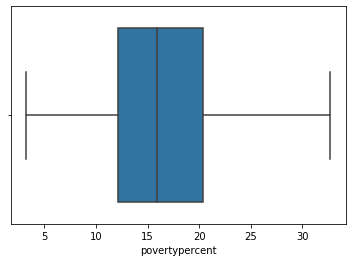

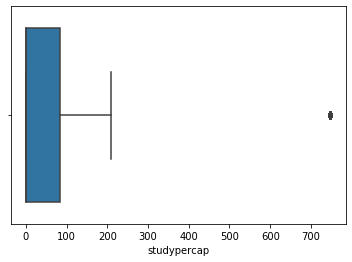

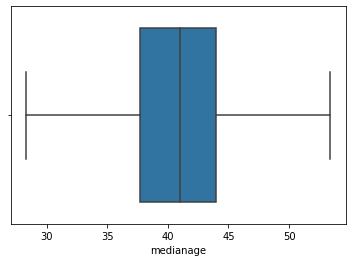

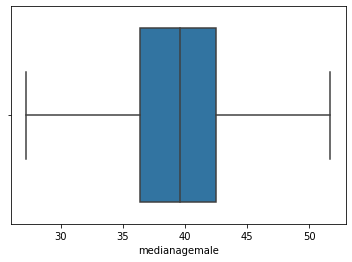

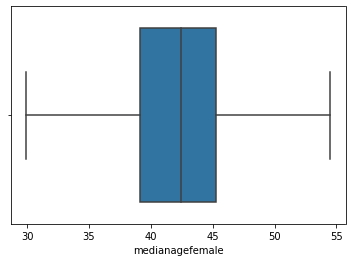

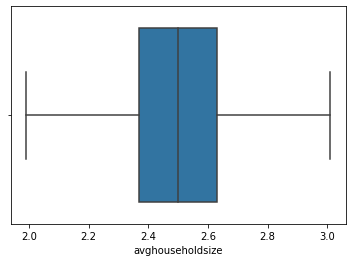

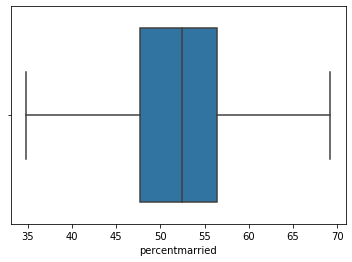

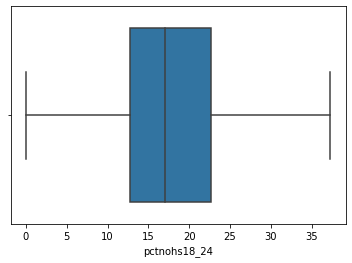

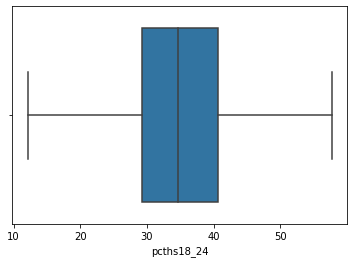

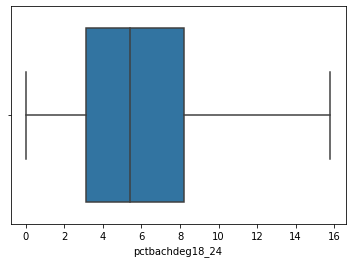

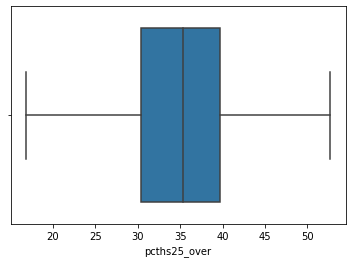

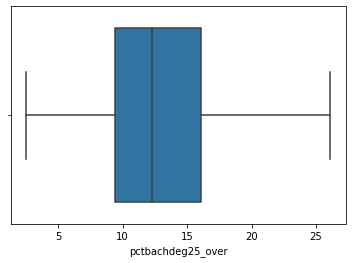

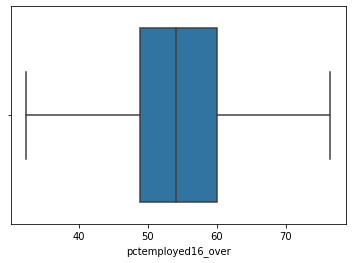

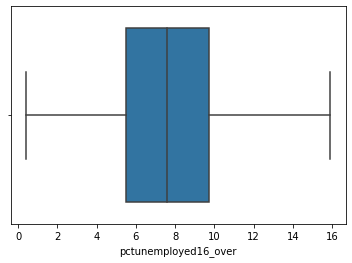

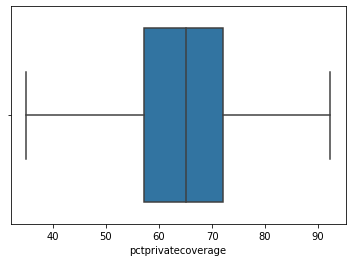

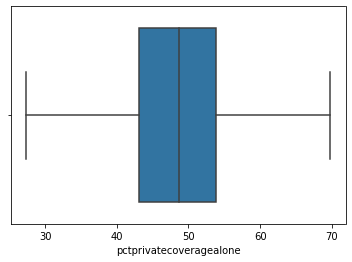

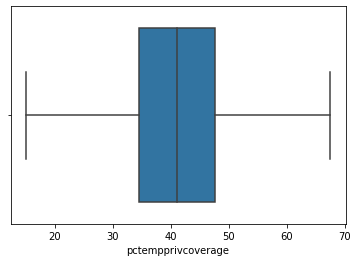

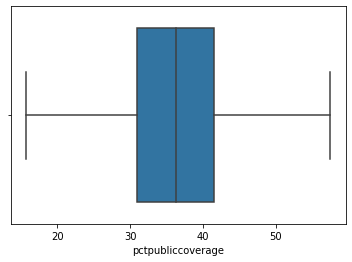

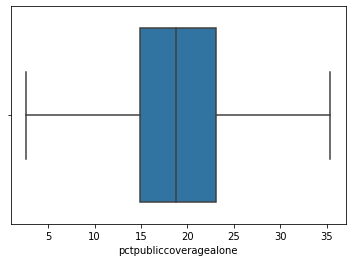

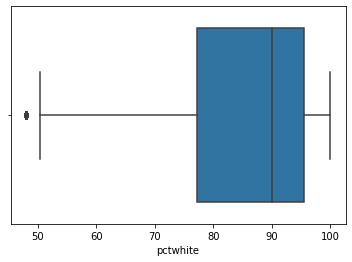

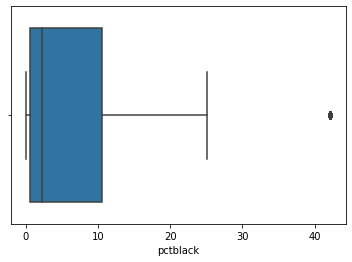

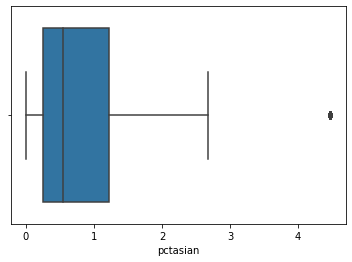

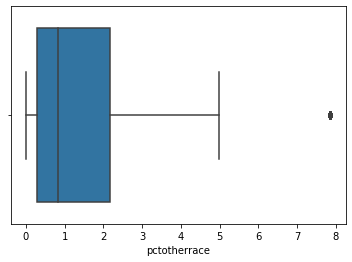

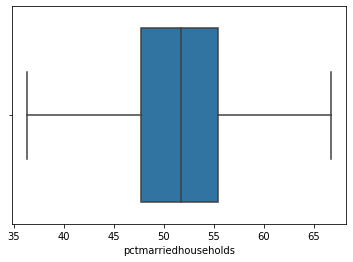

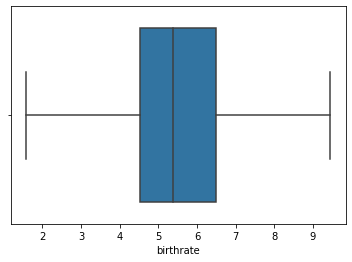

In [943]:
 for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [944]:
num_data.skew()

avganncount                1.586929
avgdeathsperyear           2.054854
target_deathrate           0.034415
incidencerate             -0.280320
medincome                  0.530171
popest2015                 1.951415
povertypercent             0.484156
studypercap                1.723031
medianage                  0.003767
medianagemale              0.058347
medianagefemale           -0.124513
avghouseholdsize           0.314482
percentmarried            -0.264584
pctnohs18_24               0.357828
pcths18_24                 0.012582
pctbachdeg18_24            0.598076
pcths25_over              -0.185427
pctbachdeg25_over          0.573627
pctemployed16_over        -0.176984
pctunemployed16_over       0.212135
pctprivatecoverage        -0.252556
pctprivatecoveragealone    0.006033
pctempprivcoverage         0.060862
pctpubliccoverage         -0.027021
pctpubliccoveragealone     0.222861
pctwhite                  -1.201861
pctblack                   1.682479
pctasian                   1

In [945]:
d = pd.concat([num_data,cat_data],axis=1)
d.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedinc,geography
0,1972.000305,749.400000,164.900000,489.800000,61898.000000,436220.100000,11.200000,747.578565,39.300000,36.900000,41.700000,2.540000,52.500000,11.500000,39.500000,6.900000,23.200000,19.600000,51.900000,8.000000,75.100000,48.700000,41.600000,32.900000,14.000000,81.780529,2.594728,4.471892,1.843479,52.856076,6.118831,"(61494.5, 125635]",West
1,173.000000,70.000000,161.300000,411.600000,48127.000000,43269.000000,18.600000,23.111234,33.000000,32.200000,33.700000,2.340000,44.500000,6.100000,22.400000,7.500000,26.000000,22.700000,55.900000,7.800000,70.200000,53.800000,43.600000,31.100000,15.300000,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,"(48021.6, 51046.4]",West


In [946]:
d["binnedinc"]=d["binnedinc"].map({'[22640, 34218.1]':0,'(34218.1, 37413.8]':1,'(37413.8, 40362.7]':2,'(40362.7, 42724.4]':3,'(42724.4, 45201]':4,'(45201, 48021.6]':5,'(48021.6, 51046.4]':6,'(51046.4, 54545.6]':7,'(54545.6, 61494.5]':8,'(61494.5, 125635]':9})

In [947]:
d = pd.get_dummies(d,columns=['geography'],drop_first=True)

In [948]:
d.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
medianage                  0
medianagemale              0
medianagefemale            0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
binnedinc                  0
geography_North-East       0
geography_South            0
geography_West

In [949]:
d1 = d.iloc[:,:-4]

In [950]:
q1 = d1.quantile(0.25)
q3 = d1.quantile(0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr

In [951]:
d2 = d[~((d1<lb) | (d1>ub)).any(axis=1)]
d2.head(5)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedinc,geography_North-East,geography_South,geography_West
1,173.000000,70.000000,161.300000,411.600000,48127.000000,43269.000000,18.600000,23.111234,33.000000,32.200000,33.700000,2.340000,44.500000,6.100000,22.400000,7.500000,26.000000,22.700000,55.900000,7.800000,70.200000,53.800000,43.600000,31.100000,15.300000,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,6,0,0,1
2,102.000000,50.000000,174.700000,349.700000,49348.000000,21026.000000,14.600000,47.560164,45.000000,44.000000,45.800000,2.620000,54.200000,24.000000,36.600000,9.500000,29.000000,16.000000,45.900000,7.000000,63.700000,43.500000,34.900000,42.100000,21.100000,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,6,0,0,1
4,57.000000,26.000000,144.400000,350.100000,49955.000000,10321.000000,12.500000,0.000000,48.300000,47.800000,48.900000,2.340000,57.800000,14.900000,43.000000,2.000000,33.400000,15.000000,48.200000,4.800000,61.600000,43.900000,35.100000,44.000000,22.700000,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,6,0,0,1
5,428.000000,152.000000,176.000000,505.400000,52313.000000,61023.000000,15.600000,180.259902,45.400000,43.500000,48.000000,2.580000,50.400000,29.900000,35.100000,4.500000,30.400000,11.900000,44.100000,12.900000,60.000000,38.800000,32.600000,43.200000,20.200000,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476,7,0,0,1
7,146.000000,71.000000,183.600000,404.000000,40189.000000,20848.000000,17.800000,0.000000,51.700000,50.800000,52.500000,2.240000,52.700000,27.300000,33.900000,2.200000,31.600000,11.300000,40.900000,8.900000,55.800000,33.100000,25.900000,50.900000,24.100000,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179,2,0,0,1


In [952]:
d2 = d2.reset_index(drop=True)

In [953]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(d2.iloc[:,:-4])

In [954]:
data_sc = pd.DataFrame(data_sc,columns=d2.iloc[:,:-4].columns)
data_sc.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0.037615,0.018423,-0.758291,-0.727183,0.286204,0.452555,0.488364,0.233576,-2.056889,-1.979489,-2.196610,-0.671398,-1.897721,-1.714355,-1.632208,0.620416,-1.830936,2.573713,0.314734,0.151078,0.587468,0.697538,0.357627,-0.834344,-0.679912,-0.270644,-0.500040,3.459779,2.513077,-1.675116,-0.700249
1,-0.428228,-0.314326,-0.242205,-1.986525,0.420585,-0.323417,-0.299444,0.865559,0.566976,0.653725,0.489369,0.737671,0.017979,0.811163,-0.003750,1.206479,-1.340379,0.962876,-1.025711,-0.116044,-0.103268,-0.583167,-0.662848,0.682376,0.382850,-0.045225,-0.541737,-0.158552,1.606433,0.277599,-1.051433


In [955]:
d_final = pd.concat([data_sc,d2.iloc[:,-4:]],axis=1)
d_final.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedinc,geography_North-East,geography_South,geography_West
0,0.037615,0.018423,-0.758291,-0.727183,0.286204,0.452555,0.488364,0.233576,-2.056889,-1.979489,-2.196610,-0.671398,-1.897721,-1.714355,-1.632208,0.620416,-1.830936,2.573713,0.314734,0.151078,0.587468,0.697538,0.357627,-0.834344,-0.679912,-0.270644,-0.500040,3.459779,2.513077,-1.675116,-0.700249,6,0,0,1
1,-0.428228,-0.314326,-0.242205,-1.986525,0.420585,-0.323417,-0.299444,0.865559,0.566976,0.653725,0.489369,0.737671,0.017979,0.811163,-0.003750,1.206479,-1.340379,0.962876,-1.025711,-0.116044,-0.103268,-0.583167,-0.662848,0.682376,0.382850,-0.045225,-0.541737,-0.158552,1.606433,0.277599,-1.051433,6,0,0,1


In [941]:
import statsmodels.api as sm

In [942]:
out = d_final.target_deathrate
inp = d_final.drop('target_deathrate',1)
inp.head(2)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,binnedinc,geography_North-East,geography_South,geography_West
0,0.037615,0.018423,-0.727183,0.286204,0.452555,0.488364,0.233576,-2.056889,-1.979489,-2.196610,-0.671398,-1.897721,-1.714355,-1.632208,0.620416,-1.830936,2.573713,0.314734,0.151078,0.587468,0.697538,0.357627,-0.834344,-0.679912,-0.270644,-0.500040,3.459779,2.513077,-1.675116,-0.700249,6,0,0,1
1,-0.428228,-0.314326,-1.986525,0.420585,-0.323417,-0.299444,0.865559,0.566976,0.653725,0.489369,0.737671,0.017979,0.811163,-0.003750,1.206479,-1.340379,0.962876,-1.025711,-0.116044,-0.103268,-0.583167,-0.662848,0.682376,0.382850,-0.045225,-0.541737,-0.158552,1.606433,0.277599,-1.051433,6,0,0,1


In [891]:
inp_c = sm.add_constant(inp)
mod = sm.OLS(out,inp_c)
ols_mod = mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:34:53   Log-Likelihood:                -1360.0
No. Observations:                1584   AIC:                             2756.
Df Residuals:                    1566   BIC:                             2853.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3219      0.101      3.182      0.001       0.123       0.520
avganncount                -3.0909      0.129    -24.031      0.000      -3.343      -2.839
avgdeathsperyear            2.8850      0.109     26.461      0.000       2.671       3.099
incidencerate               0.5152      0.018     28.233      0.000       0.479       0.551
medincome                   0.2129      0.062      3.415      0.001       0.091       0.335
popest2015                  0.1690      0.065      2.600      0.009       0.042       0.296
pcths18_24                  0.0408      0.017      2.462      0.014       0.008       0.073
pcths25_over                0.0751      0.021      3.626      0.000       0.034       0.116
pctemployed16_over         -0.0638      0.027     -2.362      0.018      -0.117      -0.011
pctunemployed16_over        0.0605      0.023      2.652      0.008       0.016       0.105
pctprivatecoverage         -0.3139      0.037     -8.574      0.000      -0.386      -0.242
pctprivatecoveragealone     0.0807      0.030      2.678      0.007       0.022       0.140
pctempprivcoverage          0.1586      0.032      4.901      0.000       0.095       0.222
pctotherrace               -0.0436      0.017     -2.631      0.009      -0.076      -0.011
pctmarriedhouseholds       -0.0360      0.018     -2.036      0.042      -0.071      -0.001
binnedinc                  -0.0833      0.022     -3.718      0.000      -0.127      -0.039
geography_South             0.1398      0.040      3.463      0.001       0.061       0.219
geography_West             -0.2269      0.056     -4.072      0.000      -0.336      -0.118
==============================================================================
Omnibus:                       72.090   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.526
Skew:                           0.335   Prob(JB):                     1.01e-29
Kurtosis:                       4.255   Cond. No.                         59.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [875]:
#Linearity

In [876]:
ypred = ols_mod.predict()

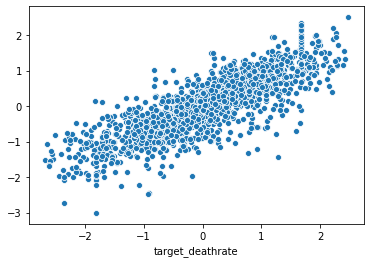

In [877]:
sns.scatterplot(out,ypred)

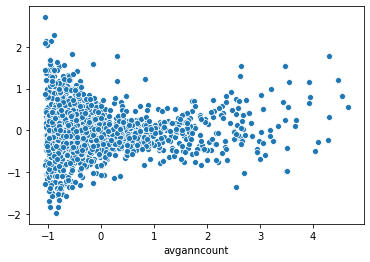

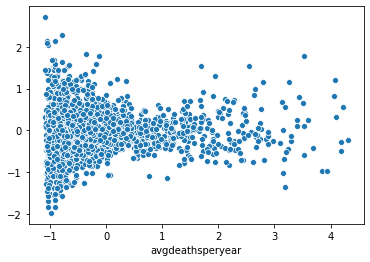

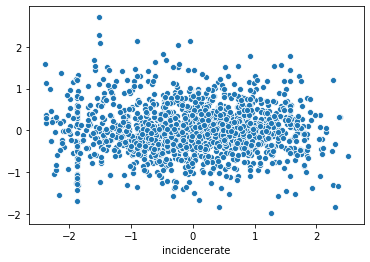

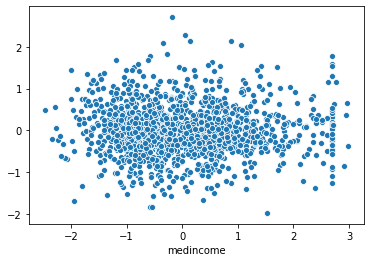

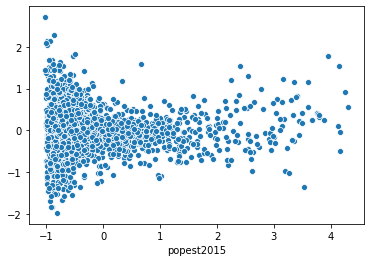

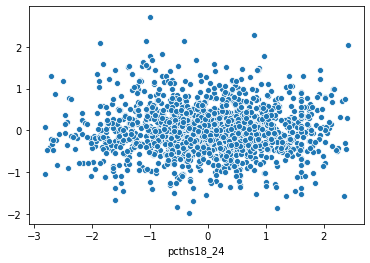

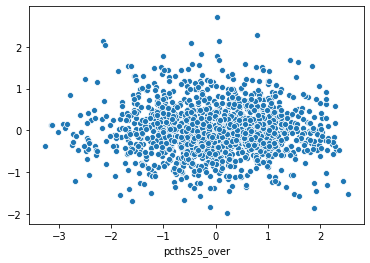

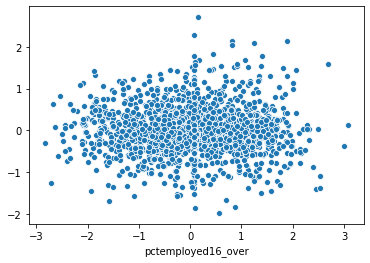

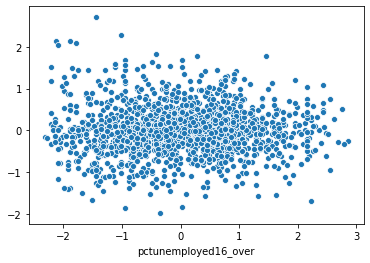

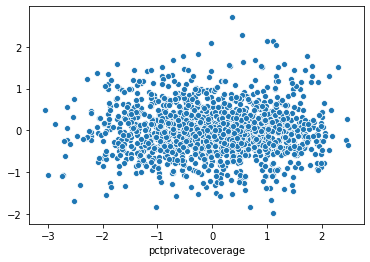

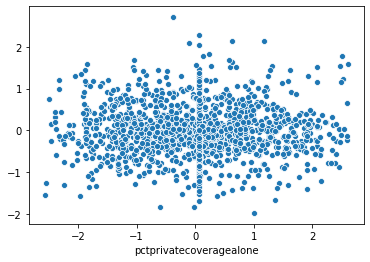

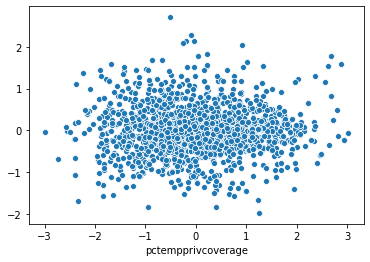

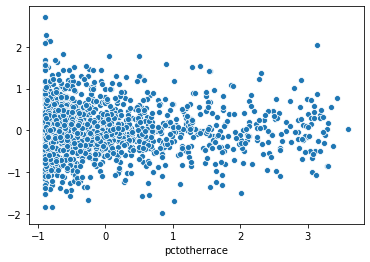

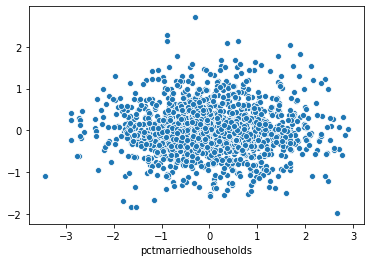

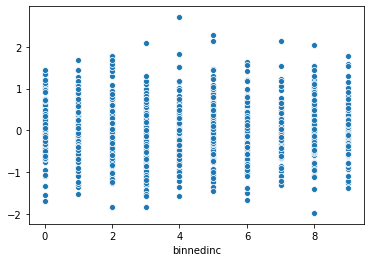

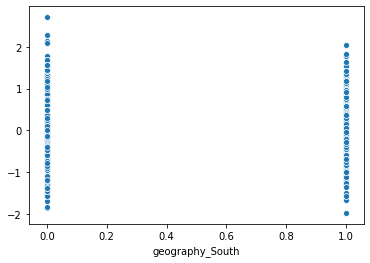

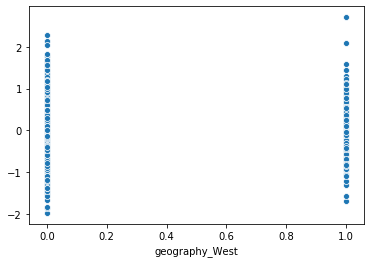

In [878]:
for i in inp.columns:
    sns.scatterplot(inp[i],ols_mod.resid)
    plt.show()

In [879]:
# Normality

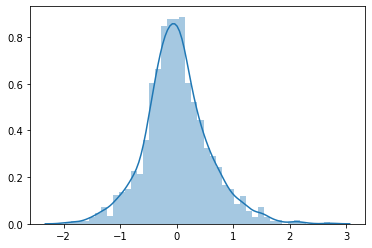

In [880]:
sns.distplot(ols_mod.resid)

In [881]:
ols_mod.resid.skew()

0.33509847191605086

In [882]:
import scipy.stats as stats

((array([-3.3279122 , -3.07233962, -2.93031233, ...,  2.93031233,
          3.07233962,  3.3279122 ]),
  array([-1.98398664, -1.84378869, -1.83057757, ...,  2.13808587,
          2.28583105,  2.71540266])),
 (0.56710627868084, 3.100644775172323e-15, 0.9913037250351515))

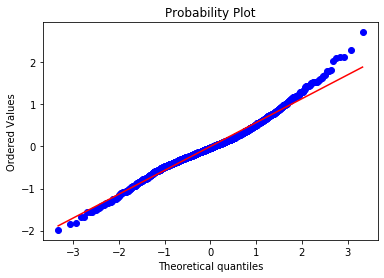

In [883]:
stats.probplot(ols_mod.resid,plot=plt)

In [884]:
out.skew()

-0.11924131519368346

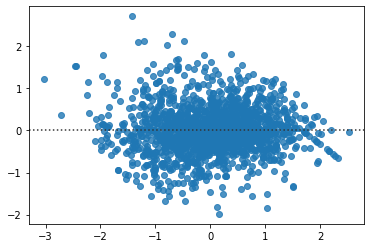

In [885]:
# Homoscadasity
# H0 : Model is homoscadasitic
sns.residplot(ols_mod.predict(),ols_mod.resid)

In [886]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)[:2]

(0.9494853264251963, 0.764476529375232)

In [887]:
y_pred = ols_mod.predict()

In [888]:
y_act = out

In [889]:
mse = np.mean((y_act-y_pred)**2)

In [890]:
rmse = np.sqrt(mse)
rmse

0.5710204282432969

In [664]:
while(len(inp.columns)>0):
    inpc=sm.add_constant(inp)
    ols=sm.OLS(out,inpc)
    ols_mod=ols.fit()
    
    f=ols_mod.pvalues[1:].idxmax()
    if ols_mod.pvalues[1:].max()>0.05:
        inp=inp.drop(f,axis=1)
    else:
        break

print('The Final Features are :', inp.columns)    

The Final Features are : Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'pcths18_24', 'pcths25_over', 'pctemployed16_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone',
       'pctempprivcoverage', 'pctotherrace', 'pctmarriedhouseholds',
       'binnedinc', 'geography_South', 'geography_West'],
      dtype='object')


In [665]:
import statsmodels.api as sm
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:41:20   Log-Likelihood:                -1360.0
No. Observations:                1584   AIC:                             2756.
Df Residuals:                    1566   BIC:                             2853.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3219      0.101      3.182      0.001       0.123       0.520
avganncount                -3.0909      0.129    -24.031      0.000      -3.343      -2.839
avgdeathsperyear            2.8850      0.109     26.461      0.000       2.671       3.099
incidencerate               0.5152      0.018     28.233      0.000       0.479       0.551
medincome                   0.2129      0.062      3.415      0.001       0.091       0.335
popest2015                  0.1690      0.065      2.600      0.009       0.042       0.296
pcths18_24                  0.0408      0.017      2.462      0.014       0.008       0.073
pcths25_over                0.0751      0.021      3.626      0.000       0.034       0.116
pctemployed16_over         -0.0638      0.027     -2.362      0.018      -0.117      -0.011
pctunemployed16_over        0.0605      0.023      2.652      0.008       0.016       0.105
pctprivatecoverage         -0.3139      0.037     -8.574      0.000      -0.386      -0.242
pctprivatecoveragealone     0.0807      0.030      2.678      0.007       0.022       0.140
pctempprivcoverage          0.1586      0.032      4.901      0.000       0.095       0.222
pctotherrace               -0.0436      0.017     -2.631      0.009      -0.076      -0.011
pctmarriedhouseholds       -0.0360      0.018     -2.036      0.042      -0.071      -0.001
binnedinc                  -0.0833      0.022     -3.718      0.000      -0.127      -0.039
geography_South             0.1398      0.040      3.463      0.001       0.061       0.219
geography_West             -0.2269      0.056     -4.072      0.000      -0.336      -0.118
==============================================================================
Omnibus:                       72.090   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.526
Skew:                           0.335   Prob(JB):                     1.01e-29
Kurtosis:                       4.255   Cond. No.                         59.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [669]:
y_pred = ols_mod.predict()

In [670]:
y_act = out

In [671]:
mse = np.mean((y_act-y_pred)**2)

In [672]:
rmse = np.sqrt(mse)
rmse

0.5710204282432969

In [810]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [811]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

In [812]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

res_lr=[rmse_train,rmse_test,r2_train,r2_test]
res_lr

[0.5825163280262382,
 0.5485823542974676,
 0.6706512257605425,
 0.6761848541023386]

In [813]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [814]:
lr=LinearRegression()
lr_back=sfs(estimator=lr,k_features='best',forward=False)
sfs_back=lr_back.fit(xtrain,ytrain)
back_feat=sfs_back.k_feature_names_
sfs_back.k_score_

0.6518851936322424

In [815]:
back_feat=list(back_feat)
print(back_feat)

['avganncount', 'avgdeathsperyear', 'incidencerate', 'popest2015', 'pcths18_24', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctotherrace', 'binnedinc', 'geography_South', 'geography_West']


In [816]:
xtrain[back_feat].head()

,avganncount,avgdeathsperyear,incidencerate,popest2015,pcths18_24,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctotherrace,binnedinc,geography_South,geography_West
888,-0.749725,-0.813450,0.202573,-0.817754,0.271482,-0.382298,0.718713,-0.028881,-1.130264,-1.671594,-0.580246,2,0,1
721,0.057298,0.118248,1.911534,-0.109496,-0.382195,-1.079329,1.252957,-1.102180,-0.769677,-0.287501,-0.832737,1,1,0
1329,-0.303566,-0.264414,1.579914,-0.460415,-0.554215,-0.154422,-0.383166,-0.113895,0.063403,0.345897,-0.857307,2,1,0
807,-0.100170,-0.014852,0.747813,-0.165662,-0.164302,-0.811240,0.351420,-1.622889,-1.416247,-0.944359,-0.183571,1,1,0
403,-0.631624,-0.613801,0.035746,-0.655428,2.370128,-1.789764,2.388226,-1.739783,-1.863872,-1.519109,-0.336163,1,1,0


In [817]:
lr=LinearRegression()
lr_forw=sfs(estimator=lr,k_features='best',forward=True)
sfs_forw=lr_forw.fit(xtrain,ytrain)
forw_feat=sfs_forw.k_feature_names_
forw_feat=list(forw_feat)
sfs_forw.k_score_

0.6509607898550858

In [818]:
forw_feat=list(forw_feat)
print(forw_feat)

['avganncount', 'avgdeathsperyear', 'incidencerate', 'popest2015', 'pcths18_24', 'pcths25_over', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctotherrace', 'binnedinc', 'geography_South', 'geography_West']


In [819]:
xtrain[forw_feat].head()

,avganncount,avgdeathsperyear,incidencerate,popest2015,pcths18_24,pcths25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctotherrace,binnedinc,geography_South,geography_West
888,-0.749725,-0.813450,0.202573,-0.817754,0.271482,-0.669952,-0.382298,0.718713,-0.028881,-1.130264,-1.671594,-0.580246,2,0,1
721,0.057298,0.118248,1.911534,-0.109496,-0.382195,0.687255,-1.079329,1.252957,-1.102180,-0.769677,-0.287501,-0.832737,1,1,0
1329,-0.303566,-0.264414,1.579914,-0.460415,-0.554215,0.180347,-0.154422,-0.383166,-0.113895,0.063403,0.345897,-0.857307,2,1,0
807,-0.100170,-0.014852,0.747813,-0.165662,-0.164302,-0.163043,-0.811240,0.351420,-1.622889,-1.416247,-0.944359,-0.183571,1,1,0
403,-0.631624,-0.613801,0.035746,-0.655428,2.370128,1.717425,-1.789764,2.388226,-1.739783,-1.863872,-1.519109,-0.336163,1,1,0


In [820]:
# RFE -Recursive Feature Elimination
lr=LinearRegression()
from sklearn.feature_selection import RFE
rfe_mod=RFE(estimator=lr,n_features_to_select=8)
rfe_feat=rfe_mod.fit(xtrain,ytrain)

In [821]:
rfe_feat.ranking_

array([ 1,  1,  1,  2,  1,  8,  5,  7,  4,  1,  6,  1,  9, 10,  3,  1,  1])

In [822]:
rank=pd.DataFrame()
rank['Rank']=rfe_feat.ranking_
rank['Feature']=xtrain.columns
rank.sort_values('Rank')

,Rank,Feature
0,1,avganncount
11,1,pctempprivcoverage
9,1,pctprivatecoverage
15,1,geography_South
16,1,geography_West
2,1,incidencerate
1,1,avgdeathsperyear
4,1,popest2015
3,2,medincome
14,3,binnedinc


In [823]:
rfe_feat=rank[rank['Rank']==1]

In [824]:
rfe_feat = rfe_feat['Feature']
rfe_feat

0            avganncount
1       avgdeathsperyear
2          incidencerate
4             popest2015
9     pctprivatecoverage
11    pctempprivcoverage
15       geography_South
16        geography_West
Name: Feature, dtype: object

In [825]:
lr=LinearRegression()
lr.fit(xtrain[back_feat],ytrain)

ypred_train=lr.predict(xtrain[back_feat])
ypred_test=lr.predict(xtest[back_feat])

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

mse_train=mean_squared_error(ytrain,ypred_train)
mse_test=mean_squared_error(ytest,ypred_test)

res_back=[rmse_train,rmse_test,r2_train,r2_test]

In [826]:
res_back

[0.5825163280262382,
 0.5485823542974676,
 0.6687158170735605,
 0.6668120101519939]

In [827]:
lr=LinearRegression()
lr.fit(xtrain[forw_feat],ytrain)

ypred_train=lr.predict(xtrain[forw_feat])
ypred_test=lr.predict(xtest[forw_feat])

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

mse_train=mean_squared_error(ytrain,ypred_train)
mse_test=mean_squared_error(ytest,ypred_test)

res_forw=[rmse_train,rmse_test,r2_train,r2_test]

In [828]:
res_forw

[0.5825163280262382,
 0.5485823542974676,
 0.6692147617796378,
 0.6705976469838483]

In [829]:
lr=LinearRegression()
lr.fit(xtrain[rfe_feat],ytrain)

ypred_train=lr.predict(xtrain[rfe_feat])
ypred_test=lr.predict(xtest[rfe_feat])

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

mse_train=mean_squared_error(ytrain,ypred_train)
mse_test=mean_squared_error(ytest,ypred_test)

res_rfe=[rmse_train,rmse_test,r2_train,r2_test]

In [830]:
res_rfe

[0.5825163280262382,
 0.5485823542974676,
 0.6553220491375324,
 0.6411270427199234]

In [857]:
result=pd.DataFrame()
result['Back_Elim']=res_back
result['Forw_Sel']=res_forw
result['RFE']=res_rfe
result.index=['rmse_train','rmse_test','r2_train','r2_test']

In [858]:
result

,Back_Elim,Forw_Sel,RFE
rmse_train,0.582516,0.582516,0.582516
rmse_test,0.548582,0.548582,0.548582
r2_train,0.668716,0.669215,0.655322
r2_test,0.666812,0.670598,0.641127


In [833]:
from sklearn.linear_model import Ridge

In [834]:
rid1 = Ridge(alpha=0.1)
rid1.fit(xtrain,ytrain)

ypred_train = rid1.predict(xtrain)
ypred_test = rid1.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

res_rid1=[rmse_train,rmse_test,r2_train,r2_test]
res_rid1

[0.5825304212189863, 0.54885652628488, 0.6706352892736778, 0.6758610987827401]

In [835]:
rid2 = Ridge(alpha=45)
rid2.fit(xtrain,ytrain)

ypred_train = rid2.predict(xtrain)
ypred_test = rid2.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

res_rid2=[rmse_train,rmse_test,r2_train,r2_test]
res_rid2

[0.6617179616130114, 0.6376175440873291, 0.575003169210816, 0.5625443735375512]

In [836]:
from sklearn.linear_model import Lasso

In [837]:
las1 = Lasso(alpha=0.001)
las1.fit(xtrain,ytrain)

ypred_train = las1.predict(xtrain)
ypred_test = las1.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

res_las1=[rmse_train,rmse_test,r2_train,r2_test]
res_las1

[0.582806726266748, 0.550844055274203, 0.6703227675184917, 0.6735092932005118]

In [838]:
from sklearn.linear_model import ElasticNet

In [839]:
en = ElasticNet(alpha=0.1,l1_ratio=0.5)
en.fit(xtrain,ytrain)

ypred_train = en.predict(xtrain)
ypred_test = en.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

res_en=[rmse_train,rmse_test,r2_train,r2_test]
res_en

[0.7298738046614022,
 0.7172769043825862,
 0.48294659911875615,
 0.44641134063699683]

In [840]:
result1 = pd.DataFrame()
result1['Lr'] = res_lr
result1['rid1'] = res_rid1
result1['rid2'] = res_rid2
result1['las1'] = res_las1
result1['elastic_net'] = res_en
result1.index=('rmse_train','rmse_test','r2_train','r2_test')
result1

,Lr,rid1,rid2,las1,elastic_net
rmse_train,0.582516,0.582530,0.661718,0.582807,0.729874
rmse_test,0.548582,0.548857,0.637618,0.550844,0.717277
r2_train,0.670651,0.670635,0.575003,0.670323,0.482947
r2_test,0.676185,0.675861,0.562544,0.673509,0.446411


In [841]:
from sklearn.model_selection import GridSearchCV

In [842]:
rid = Ridge()
param = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

In [843]:
grid = GridSearchCV(rid,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [844]:
hyp_rid = grid.fit(xtrain,ytrain)

In [845]:
hyp_rid.best_params_

{'alpha': 0.1}

In [846]:
hyp_rid.best_score_

-0.35369981068393636

In [847]:
las = Lasso()
param = {'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

In [848]:
grid = GridSearchCV(las,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [849]:
hyp_rid1 = grid.fit(xtrain,ytrain)

In [850]:
hyp_rid1.best_params_

{'alpha': 0.0001}

In [851]:
from sklearn.linear_model import ElasticNet

enet=ElasticNet()     #hyper paramater of ridge is alpha
param={'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}

grid=GridSearchCV(enet,param_grid=param,cv=5,scoring='r2')
hyp_rid2=grid.fit(xtrain,ytrain)

In [852]:
hyp_rid2.best_params_

{'alpha': 0.1, 'l1_ratio': 0.5}

In [853]:
result

,Back_Elim,Forw_Sel,RFE
R2_train,0.582516,0.582516,0.582516
R2_test,0.548582,0.548582,0.548582
mse_train,0.668716,0.669215,0.655322
mse_test,0.666812,0.670598,0.641127


In [854]:
result1

,Lr,rid1,rid2,las1,elastic_net
rmse_train,0.582516,0.582530,0.661718,0.582807,0.729874
rmse_test,0.548582,0.548857,0.637618,0.550844,0.717277
r2_train,0.670651,0.670635,0.575003,0.670323,0.482947
r2_test,0.676185,0.675861,0.562544,0.673509,0.446411


In [859]:
final_result = pd.concat([result,result1],axis=1)

In [860]:
final_result

,Back_Elim,Forw_Sel,RFE,Lr,rid1,rid2,las1,elastic_net
rmse_train,0.582516,0.582516,0.582516,0.582516,0.582530,0.661718,0.582807,0.729874
rmse_test,0.548582,0.548582,0.548582,0.548582,0.548857,0.637618,0.550844,0.717277
r2_train,0.668716,0.669215,0.655322,0.670651,0.670635,0.575003,0.670323,0.482947
r2_test,0.666812,0.670598,0.641127,0.676185,0.675861,0.562544,0.673509,0.446411


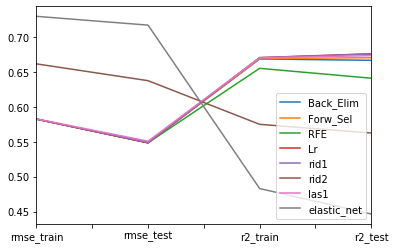

In [873]:
final_result.plot(secondary_y=['rmse_train','rmse_test','r2_train','r2_test'])
plt.show()

# As the R-squared of rid1 has highest accuracy it can be concluded that ridge linear equation can be used to predict death-rate.